In [72]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data_train = pd.read_csv(r"C:\Users\Shaurya\Desktop\ML project\train.csv")


In [73]:
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,14-09-2016,PT7M37S,F
1,VID_14135,2,1707,56,2,6,01-10-2016,PT9M30S,D
2,VID_2187,1,2023,25,0,2,02-07-2016,PT2M16S,C
3,VID_23096,6,620860,777,161,153,27-07-2016,PT4M22S,H
4,VID_10175,1,666,1,0,0,29-06-2016,PT31S,D


In [74]:
data_train.shape

(14999, 9)

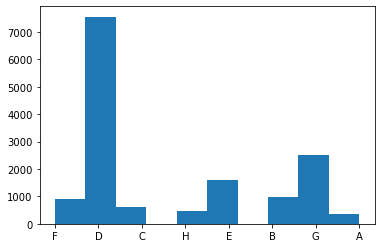

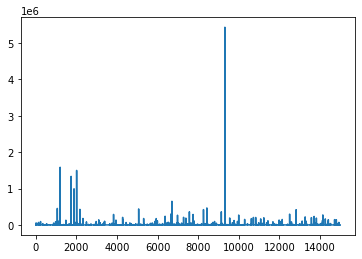

In [75]:
# Visualization
# Individual Plots
plt.hist(data_train["category"])
plt.show()
plt.plot(data_train["adview"])
plt.show()

In [76]:
# Remove videos with adview greater than 2000000 as outlier
data_train = data_train[data_train["adview"] <2000000]

C:\Users\Shaurya\AppData\Local\Temp/ipykernel_13864/1077671707.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),


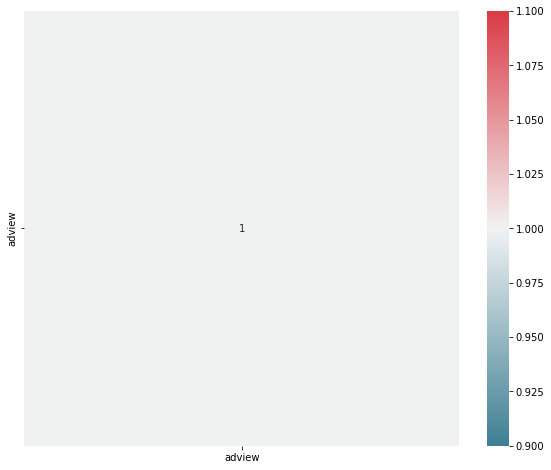

In [77]:
# Heatmap
import seaborn as sns
f, ax = plt.subplots(figsize=(10, 8))
corr = data_train.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
square=True, ax=ax,annot=True)
plt.show()

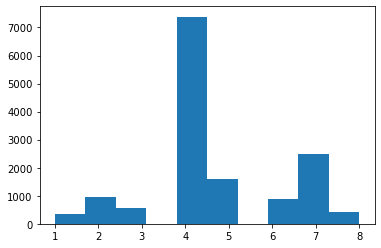

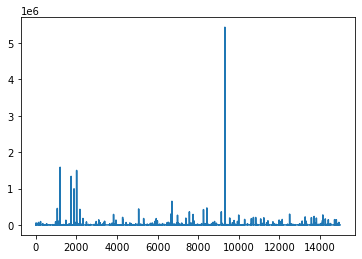

In [52]:
  #Visualisation
  #Individual Plots
  plt.hist(data_train["category"])
  plt.show()
  plt.plot(data_train["adview"])
  plt.show()

In [53]:
  #remove videos with adview greater than 2000000 as outlier
  data_train=data_train[data_train["adview"]<2000000]  

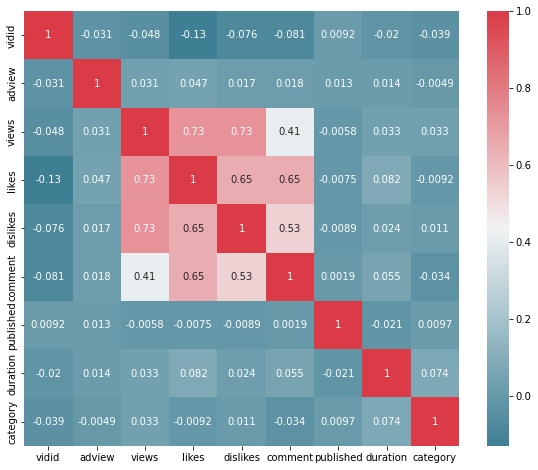

In [54]:
  #heatmap
  import seaborn as sns
  f,ax= plt.subplots(figsize=(10,8))
  corr = data_train.corr()
  sns.heatmap(corr,mask=np.zeros_like(corr,dtype=np.bool_),cmap=sns.diverging_palette(220,10,as_cmap=True),
              square=True,ax=ax,annot=True)
  plt.show()

In [78]:
# Removing character "F" present in data
data_train=data_train[data_train.views!='F']
data_train=data_train[data_train.likes!='F']
data_train=data_train[data_train.dislikes!='F']
data_train=data_train[data_train.comment!='F']

In [79]:
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,14-09-2016,PT7M37S,F
1,VID_14135,2,1707,56,2,6,01-10-2016,PT9M30S,D
2,VID_2187,1,2023,25,0,2,02-07-2016,PT2M16S,C
3,VID_23096,6,620860,777,161,153,27-07-2016,PT4M22S,H
4,VID_10175,1,666,1,0,0,29-06-2016,PT31S,D


In [80]:
# Assigning each category a number for Category feature
category={'A': 1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'H':8}
data_train["category"]=data_train["category"].map(category)
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,14-09-2016,PT7M37S,6
1,VID_14135,2,1707,56,2,6,01-10-2016,PT9M30S,4
2,VID_2187,1,2023,25,0,2,02-07-2016,PT2M16S,3
3,VID_23096,6,620860,777,161,153,27-07-2016,PT4M22S,8
4,VID_10175,1,666,1,0,0,29-06-2016,PT31S,4


In [83]:
# Convert values to integers for views, likes, comments, dislikes and adview
data_train["views"] = pd.to_numeric(data_train["views"])
data_train["comment"] = pd.to_numeric(data_train["comment"])
data_train["likes"] = pd.to_numeric(data_train["likes"])
data_train["dislikes"] = pd.to_numeric(data_train["dislikes"])
data_train["adview"]=pd.to_numeric(data_train["adview"])
column_vidid=data_train['vidid']

# Endoding features like Category, Duration, Vidid
from sklearn.preprocessing import LabelEncoder
data_train['duration']=LabelEncoder().fit_transform(data_train['duration'])
data_train['vidid']=LabelEncoder().fit_transform(data_train['vidid'])
data_train['published']=LabelEncoder().fit_transform(data_train['published'])
data_train.head()

# Convert Time_in_sec for duration
import datetime
import time
def checki(x):
  y = x[2:]
  h = ''
  m = ''
  s = ''
  mm = ''
  P = ['H','M','S']
  for i in y:
    if i not in P:
      mm+=i
    else:
      if(i=="H"):
        h = mm
        mm = ''
      elif(i == "M"):
        m = mm
        mm = ''
      else:
        s = mm
        mm = ''
  if(h==''):
    h = '00'
  if(m == ''):
    m = '00'
  if(s==''):
    s='00'
  bp = h+':'+m+':'+s
  return bp

train=pd.read_csv(r"C:\Users\Shaurya\Desktop\ML project\train.csv")
mp = pd.read_csv(r"C:\Users\Shaurya\Desktop\ML project\train.csv")["duration"]
time = mp.apply(checki)

def func_sec(time_string):
  h, m, s = time_string.split(':')
  return int(h) * 3600 + int(m) * 60 + int(s)

time1=time.apply(func_sec)

data_train["duration"]=time1
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,1090,457,6
1,2741,2,1707,56,2,6,64,570,4
2,8138,1,2023,25,0,2,122,136,3
3,9004,6,620860,777,161,153,2088,262,8
4,122,1,666,1,0,0,2233,31,4


In [84]:
# Split Data
Y_train = pd.DataFrame(data = data_train.iloc[:, 1].values, columns = ['target'])
data_train=data_train.drop(["adview"],axis=1)
data_train=data_train.drop(["vidid"],axis=1)
data_train.head()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_train, Y_train, test_size=0.2, random_state=42)

X_train.shape

# Normalise Data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

X_train.mean()

0.15357571865666558

In [85]:
# Evaluation Metrics
from sklearn import metrics
def print_error(X_test, y_test, model_name):
  prediction = model_name.predict(X_test)
  print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, prediction))
  print('Mean Squared Error:', metrics.mean_squared_error(y_test, prediction))
  print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

# Linear Regression
from sklearn import linear_model
linear_regression = linear_model.LinearRegression()
linear_regression.fit(X_train, y_train)
print_error(X_test,y_test, linear_regression)

# Support Vector Regressor
from sklearn.svm import SVR
supportvector_regressor = SVR()
supportvector_regressor.fit(X_train,y_train)
print_error(X_test,y_test, linear_regression)

Mean Absolute Error: 3493.3179717888065
Mean Squared Error: 838355049.0604035
Root Mean Squared Error: 28954.361485973117


C:\Users\Shaurya\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Mean Absolute Error: 3493.3179717888065
Mean Squared Error: 838355049.0604035
Root Mean Squared Error: 28954.361485973117


In [86]:
# Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_train, y_train)
print_error(X_test,y_test, decision_tree)

# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
n_estimators = 200
max_depth = 25
min_samples_split=15
min_samples_leaf=2
random_forest = RandomForestRegressor(n_estimators = n_estimators, max_depth = max_depth, min_samples_split=min_samples_split)
random_forest.fit(X_train,y_train)
print_error(X_test,y_test, random_forest)

Mean Absolute Error: 4613.962431693989
Mean Squared Error: 2910297588.5409837
Root Mean Squared Error: 53947.174055190175


C:\Users\Shaurya\AppData\Local\Temp/ipykernel_13864/2559792287.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest.fit(X_train,y_train)


Mean Absolute Error: 3369.907686598384
Mean Squared Error: 879661149.5367872
Root Mean Squared Error: 29659.082075087677


In [88]:
# Artificial Neural Network
import keras
import tensorflow as tf
from keras.layers import Dense
ann = keras.models.Sequential([
                                Dense(6, activation="relu",
                                input_shape=X_train.shape[1:]),
                                Dense(6,activation="relu"),
                                Dense(1)
                                ])

optimizer=tf.keras.optimizers.Adam()
loss=keras.losses.mean_squared_error
ann.compile(optimizer=optimizer,loss=loss,metrics=["mean_squared_error"])

history=ann.fit(X_train,y_train,epochs=100)

ann.summary()

print_error(X_test,y_test,ann)

Epoch 1/100
366/366 [==============================] - 0s 538us/step - loss: 767404992.0000 - mean_squared_error: 767404992.0000
Epoch 2/100
366/366 [==============================] - 0s 523us/step - loss: 767397824.0000 - mean_squared_error: 767397824.0000
Epoch 3/100
366/366 [==============================] - 0s 516us/step - loss: 767381312.0000 - mean_squared_error: 767381312.0000
Epoch 4/100
366/366 [==============================] - 0s 532us/step - loss: 767351104.0000 - mean_squared_error: 767351104.0000
Epoch 5/100
366/366 [==============================] - 0s 569us/step - loss: 767306176.0000 - mean_squared_error: 767306176.0000
Epoch 6/100
366/366 [==============================] - 0s 575us/step - loss: 767246976.0000 - mean_squared_error: 767246976.0000
Epoch 7/100
366/366 [==============================] - 0s 553us/step - loss: 767175488.0000 - mean_squared_error: 767175488.0000
Epoch 8/100
366/366 [==============================] - 0s 518us/step - loss: 767094848.0000 - mea

In [89]:
#Saving Scikitlearn models
import joblib
joblib.dump(decision_tree, "decisiontree_youtubeadview.pkl")

# Saving Keras Artificial Neural Network model
ann.save("ann_youtubeadview.h5")

In [90]:
#Testing
data_test = pd.read_csv(r"C:\Users\Shaurya\Desktop\ML project\test.csv")


In [91]:
data_test.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,VID_1054,440238,6153,218,1377,18-02-2017,PT7M29S,B
1,VID_18629,1040132,8171,340,1047,28-06-2016,PT6M29S,F
2,VID_13967,28534,31,11,1,10-03-2014,PT37M54S,D
3,VID_19442,1316715,2284,250,274,05-06-2010,PT9M55S,G
4,VID_770,1893173,2519,225,116,03-09-2016,PT3M8S,B


In [96]:
from keras.models import load_model
model = load_model(r"C:\Users\Shaurya\ann_youtubeadview.h5")

In [97]:
# Removing character "F" present in data
data_test=data_test[data_test.views!='F']
data_test=data_test[data_test.likes!='F']
data_test=data_test[data_test.dislikes!='F']
data_test=data_test[data_test.comment!='F']

In [98]:
data_test.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,VID_1054,440238,6153,218,1377,18-02-2017,PT7M29S,B
1,VID_18629,1040132,8171,340,1047,28-06-2016,PT6M29S,F
2,VID_13967,28534,31,11,1,10-03-2014,PT37M54S,D
3,VID_19442,1316715,2284,250,274,05-06-2010,PT9M55S,G
4,VID_770,1893173,2519,225,116,03-09-2016,PT3M8S,B


In [99]:
# Assigning each category a number for Category feature
category={'A': 1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'H':8}
data_test["category"]=data_test["category"].map(category)
data_test.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,VID_1054,440238,6153,218,1377,18-02-2017,PT7M29S,2
1,VID_18629,1040132,8171,340,1047,28-06-2016,PT6M29S,6
2,VID_13967,28534,31,11,1,10-03-2014,PT37M54S,4
3,VID_19442,1316715,2284,250,274,05-06-2010,PT9M55S,7
4,VID_770,1893173,2519,225,116,03-09-2016,PT3M8S,2


In [100]:
# Convert values to integers for views, likes, comments, dislikes and adview
data_test["views"] = pd.to_numeric(data_test["views"])
data_test["comment"] = pd.to_numeric(data_test["comment"])
data_test["likes"] = pd.to_numeric(data_test["likes"])
data_test["dislikes"] = pd.to_numeric(data_test["dislikes"])
column_vidid=data_test['vidid']

# Endoding features like Category, Duration, Vidid
from sklearn.preprocessing import LabelEncoder
data_test['duration']=LabelEncoder().fit_transform(data_test['duration'])
data_test['vidid']=LabelEncoder().fit_transform(data_test['vidid'])
data_test['published']=LabelEncoder().fit_transform(data_test['published'])
data_test.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,231,440238,6153,218,1377,1186,2115,2
1,3444,1040132,8171,340,1047,1898,2055,6
2,1593,28534,31,11,1,634,1506,4
3,3775,1316715,2284,250,274,307,2265,7
4,7644,1893173,2519,225,116,187,1625,2


In [102]:
# Convert Time_in_sec for duration
import datetime
import time
def checki(x):
  y = x[2:]
  h = ''
  m = ''
  s = ''
  mm = ''
  P = ['H','M','S']
  for i in y:
    if i not in P:
      mm+=i
    else:
      if(i=="H"):
        h = mm
        mm = ''
      elif(i == "M"):
        m = mm
        mm = ''
      else:
        s = mm
        mm = ''
  if(h==''):
    h = '00'
  if(m == ''):
    m = '00'
  if(s==''):
    s='00'
  bp = h+':'+m+':'+s
  return bp

train=pd.read_csv(r"C:\Users\Shaurya\Desktop\ML project\test.csv")
mp = pd.read_csv(r"C:\Users\Shaurya\Desktop\ML project\test.csv")["duration"]
time = mp.apply(checki)

def func_sec(time_string):
  h, m, s = time_string.split(':')
  return int(h) * 3600 + int(m) * 60 + int(s)

time1=time.apply(func_sec)

data_test["duration"]=time1
data_test.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,231,440238,6153,218,1377,1186,449,2
1,3444,1040132,8171,340,1047,1898,389,6
2,1593,28534,31,11,1,634,2274,4
3,3775,1316715,2284,250,274,307,595,7
4,7644,1893173,2519,225,116,187,188,2


In [103]:
data_test=data_test.drop(["vidid"],axis=1)
data_test.head()

,views,likes,dislikes,comment,published,duration,category
0,440238,6153,218,1377,1186,449,2
1,1040132,8171,340,1047,1898,389,6
2,28534,31,11,1,634,2274,4
3,1316715,2284,250,274,307,595,7
4,1893173,2519,225,116,187,188,2


In [104]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_test = data_test
X_test=scaler.fit_transform(X_test)

In [105]:
prediction = model.predict(X_test)

In [106]:
prediction=pd.DataFrame(prediction)
prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8549 entries, 0 to 8548
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       8549 non-null   float32
dtypes: float32(1)
memory usage: 33.5 KB


In [107]:
prediction = prediction.rename(columns={0: "Adview"})

In [108]:
prediction.head()

,Adview
0,1467.035400
1,2193.299561
2,1373.130859
3,1745.506836
4,1137.924805


In [109]:
prediction.to_csv('predictions.csv')